In [2]:
import os

In [3]:
import mmdet

ModuleNotFoundError: No module named 'mmdet'

In [3]:
mmdet.__version__

'2.28.1'

In [4]:
!mim search mmdet --model "mask r-cnn"

--------------------------------------------------------------------------------
config id: mask_rcnn_convnext-t_p4_w7_fpn_fp16_ms-crop_3x_coco
architecture                                            convnext
coco/box_ap                                             46.2
coco/mask_ap                                            41.7
config                                                  configs/convnext/mask...
epochs                                                  36
model                                                   mask r-cnn
paper                                                   URL,Title
readme                                                  configs/mask_rcnn/REA...
training_data                                           coco
training_memory(GB)                                     7.3
training_resources                                      8x a100 gpus
training_techniques                                     adamw,mixed precision...
weight                                      

In [10]:
!mim download mmdet --config mask_rcnn_r50_fpn_2x_coco --dest .

processing mask_rcnn_r50_fpn_2x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 388.4 kB/s eta 0:00:00m eta 0:00:010:00:11
Successfully downloaded mask_rcnn_r50_fpn_2x_coco_bbox_mAP-0.392__segm_mAP-0.354_20200505_003907-3e542a40.pth to /home/linxu/Desktop/OpenMMLab-Space/det_train
Successfully dumped mask_rcnn_r50_fpn_2x_coco.py to /home/linxu/Desktop/OpenMMLab-Space/det_train


In [11]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

In [12]:
config_file = 'mask_rcnn_r50_fpn_2x_coco.py'
checkpoint_file = 'mask_rcnn_r50_fpn_2x_coco_bbox_mAP-0.392__segm_mAP-0.354_20200505_003907-3e542a40.pth'

In [13]:
help(init_detector)

Help on function init_detector in module mmdet.apis.inference:

init_detector(config, checkpoint=None, device='cuda:0', cfg_options=None)
    Initialize a detector from config file.
    
    Args:
        config (str, :obj:`Path`, or :obj:`mmcv.Config`): Config file path,
            :obj:`Path`, or the config object.
        checkpoint (str, optional): Checkpoint path. If left as None, the model
            will not load any weights.
        cfg_options (dict): Options to override some settings in the used
            config.
    
    Returns:
        nn.Module: The constructed detector.



In [14]:
model = init_detector(config_file, checkpoint_file)

load checkpoint from local path: mask_rcnn_r50_fpn_2x_coco_bbox_mAP-0.392__segm_mAP-0.354_20200505_003907-3e542a40.pth


In [15]:
model

MaskRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          

In [17]:
img_dir = 'demo.jpg'

In [20]:
result = inference_detector(model, img_dir)
result

([array([[2.53897842e+02, 1.04629265e+02, 2.62743469e+02, 1.13436890e+02,
          1.58863947e-01],
         [3.74521240e+02, 1.19077049e+02, 3.82589813e+02, 1.46967087e+02,
          1.05448596e-01],
         [3.60634064e+02, 1.08164169e+02, 3.67597351e+02, 1.24195992e+02,
          1.01281926e-01],
         [3.75233582e+02, 1.19458679e+02, 3.82238190e+02, 1.33417099e+02,
          7.73718879e-02]], dtype=float32),
  array([], shape=(0, 5), dtype=float32),
  array([[4.81618591e+02, 1.10276810e+02, 5.21925293e+02, 1.30178635e+02,
          9.97519791e-01],
         [2.96297302e+02, 1.15949127e+02, 3.78090729e+02, 1.50562134e+02,
          9.93467033e-01],
         [9.44860876e-01, 1.14061974e+02, 6.33626747e+01, 1.45911331e+02,
          9.92811739e-01],
         [6.09474487e+02, 1.13492691e+02, 6.34769165e+02, 1.37536575e+02,
          9.87275541e-01],
         [4.31564850e+02, 1.05292587e+02, 4.84166016e+02, 1.32065659e+02,
          9.84941721e-01],
         [2.67199036e+02, 1.0602

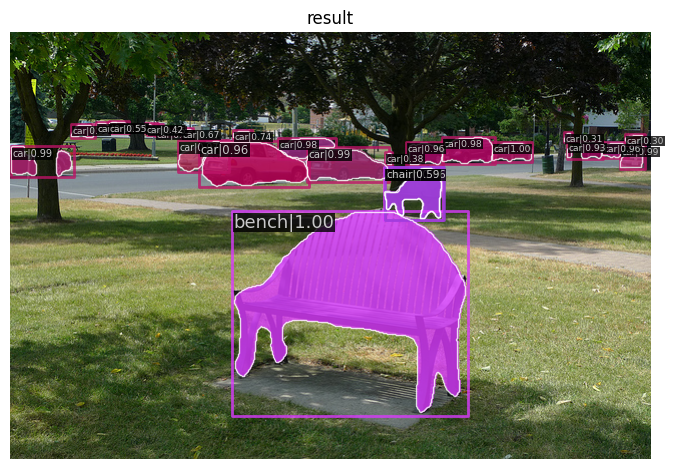

In [25]:
show_result_pyplot(model,img_dir,result)

In [34]:
from mmcv import Config
config = Config.fromfile('mask_rcnn_balloon.py')
print(config.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0)

In [42]:
!mim train mmdet mask_rcnn_balloon.py

/home/linxu/anaconda3/envs/mmlab1/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
Training command is /home/linxu/anaconda3/envs/mmlab1/bin/python /home/linxu/Desktop/OpenMMLab-Space/mmdetection/mmdet/.mim/tools/train.py mask_rcnn_balloon.py --launcher none --gpus 1. 
/home/linxu/anaconda3/envs/mmlab1/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/